<a href="https://colab.research.google.com/github/thisisnitish/image-processing-assignment/blob/main/CSE18U018_CSOE18_IP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE PROCESSING ASSIGNMENT - Nitish Kumar, CSE18U018**

#Question 1:
Write a program to implement histogram equalization for the given image.

In [1]:
# Import statements
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
# path for an image for reading it
path = "/content/images/flower.jpeg"
img = cv.imread(path, 0)

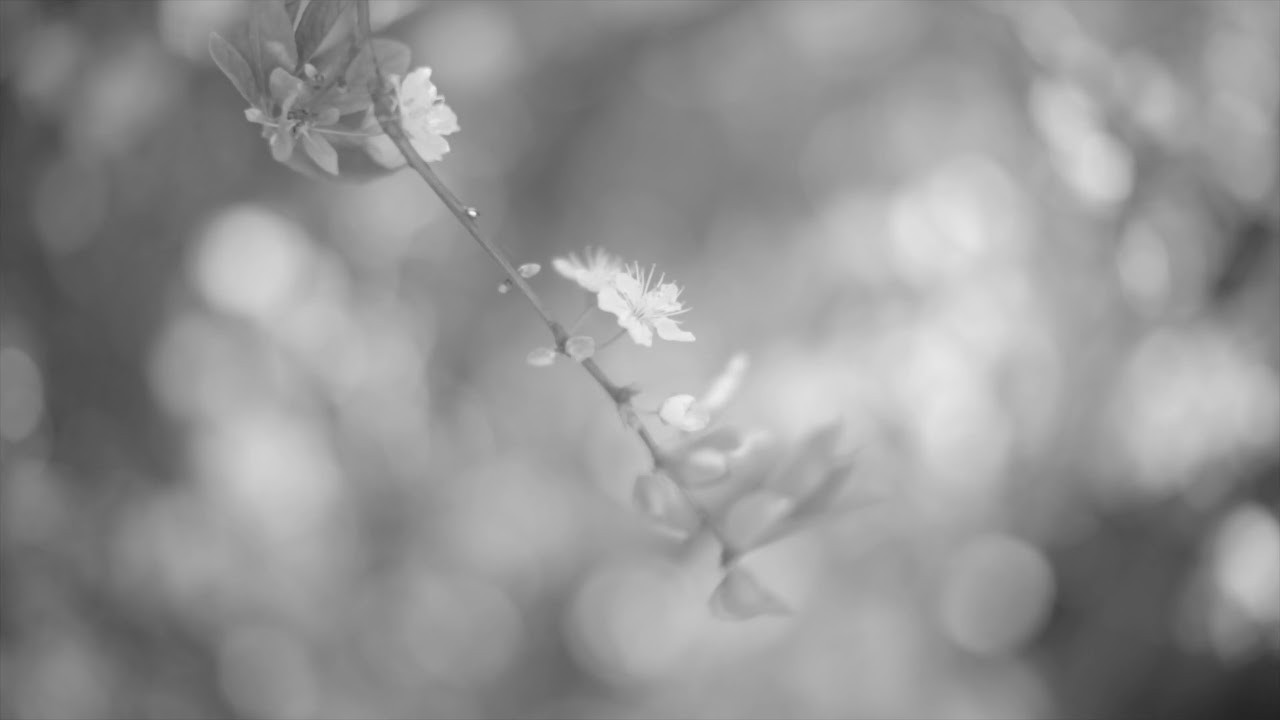

In [3]:
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

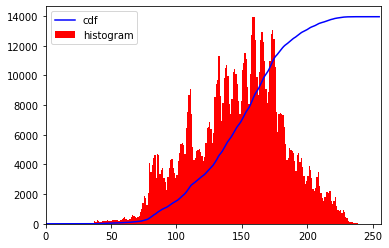

In [4]:
# view the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [5]:
# equalized the histograms
equ = cv.equalizeHist(img)

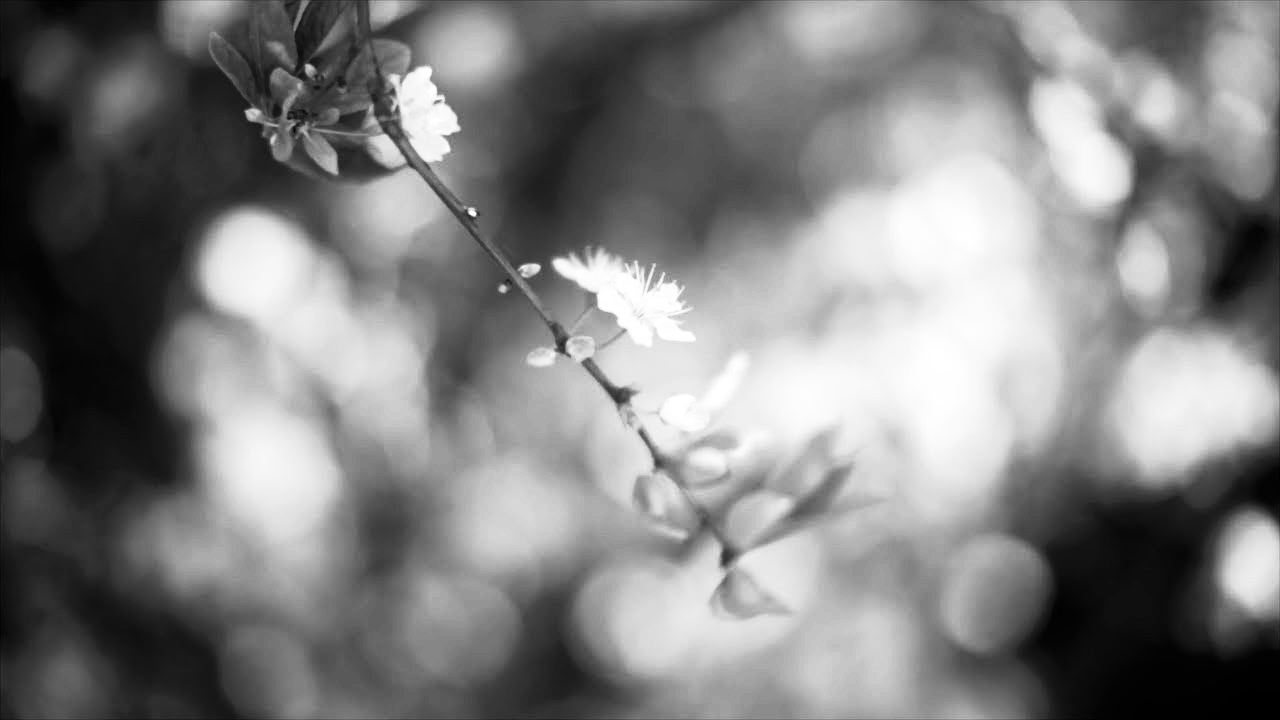

In [6]:
cv2_imshow(equ)
cv.waitKey(0)
cv.destroyAllWindows()

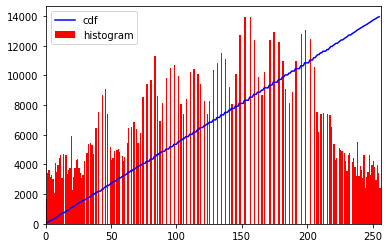

In [7]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#Question 2:
Write a program to implement Discrete Fourier Transformation for the given image and apply ideal LPF and ideal HPF.

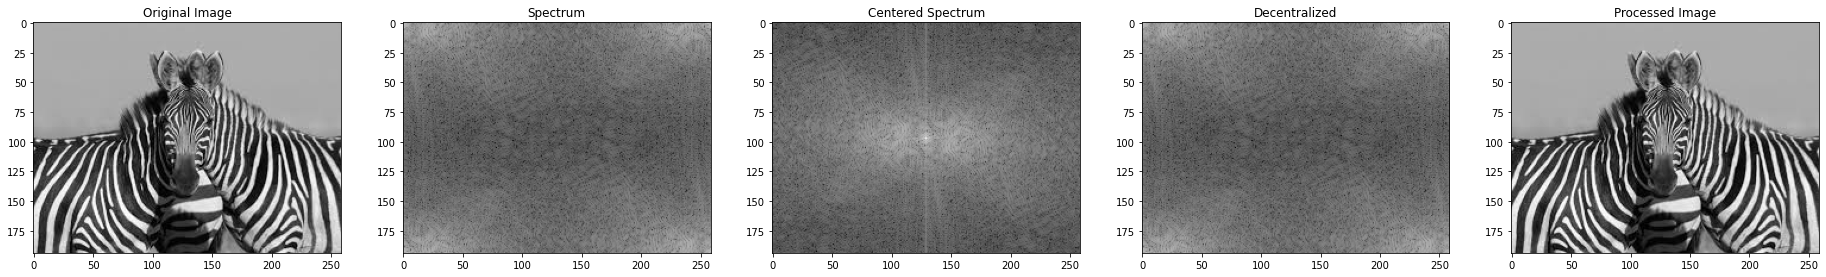

In [8]:
# Import statements
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# Path to an image
path = "/content/images/zebra.jpeg"

# Read the image
img_c1 = cv2.imread(path, 0)

# apply fft to an image
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

# Plot the images
plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

(<matplotlib.image.AxesImage at 0x7fac0820ef90>,
 Text(0.5, 1.0, 'Original Image'))

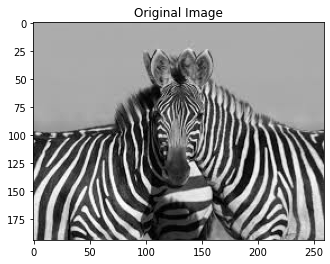

In [9]:
# read the image and show it
img_c1 = cv2.imread(path, 0)
plt.imshow(img_c1, "gray"), plt.title("Original Image")

(<matplotlib.image.AxesImage at 0x7fac0819a2d0>, Text(0.5, 1.0, 'Spectrum'))

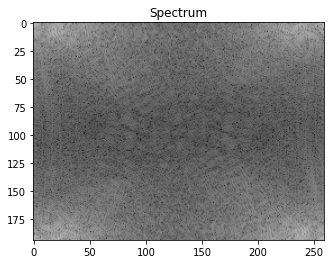

In [10]:
img_c2 = np.fft.fft2(img_c1)
plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")

(<matplotlib.image.AxesImage at 0x7fac08102ad0>,
 Text(0.5, 1.0, 'Centered Spectrum'))

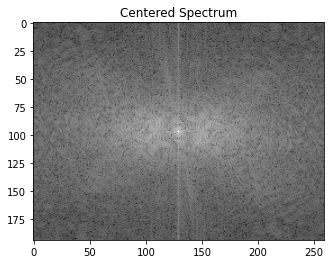

In [11]:
img_c3 = np.fft.fftshift(img_c2)
plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")

(<matplotlib.image.AxesImage at 0x7fac0807a210>,
 Text(0.5, 1.0, 'Decentralized'))

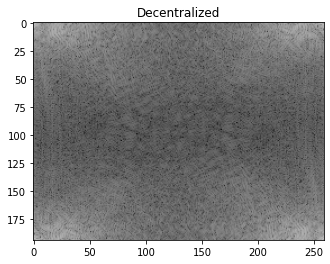

In [12]:
img_c4 = np.fft.ifftshift(img_c3)
plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")

(<matplotlib.image.AxesImage at 0x7fac08314e90>,
 Text(0.5, 1.0, 'Processed Image'))

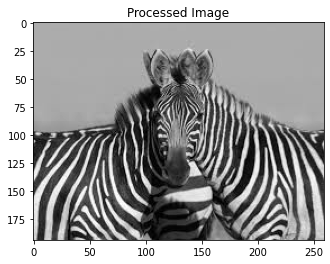

In [13]:
img_c5 = np.fft.ifft2(img_c4)
plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

In [14]:
## Gaussian Filters

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

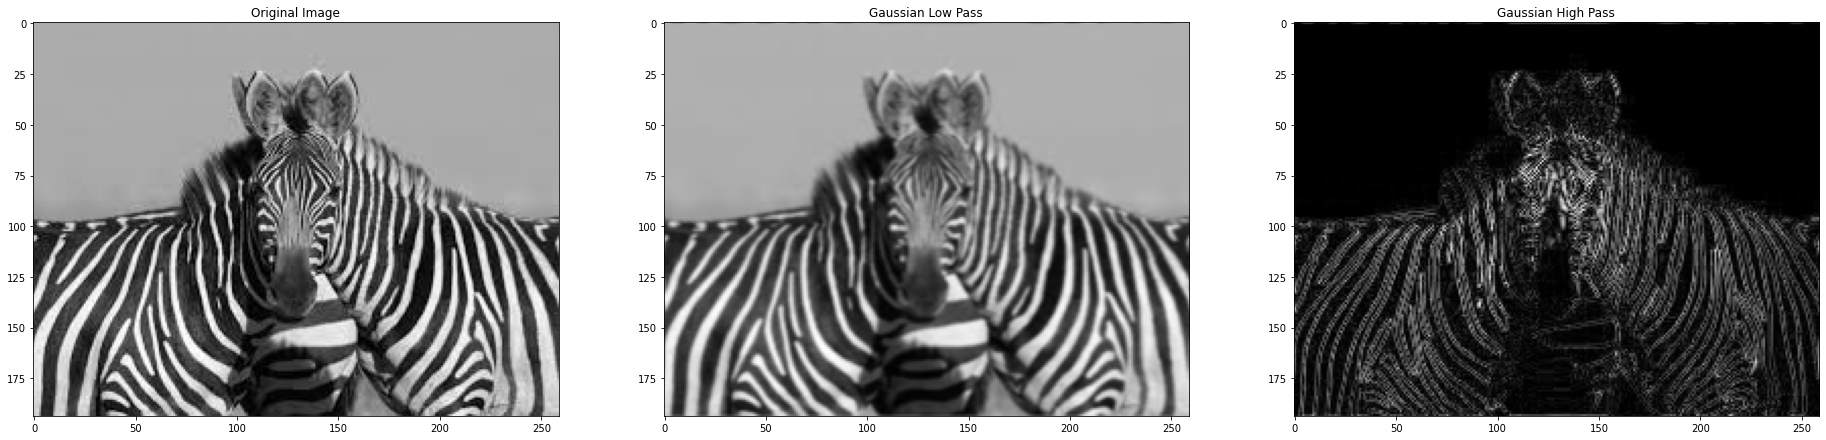

In [15]:
img = cv2.imread(path, 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

#Question 3:
Write a program to segment the image using K-Means clustering.

In [16]:
# Import statements
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
# Path to an image
path = "/content/images/beach.jpeg"
original_image = cv2.imread(path)

In [18]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [19]:
vectorized = img.reshape((-1,3))

In [20]:
vectorized = np.float32(vectorized)

In [21]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [22]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS) 

In [23]:
center = np.uint8(center)

In [24]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

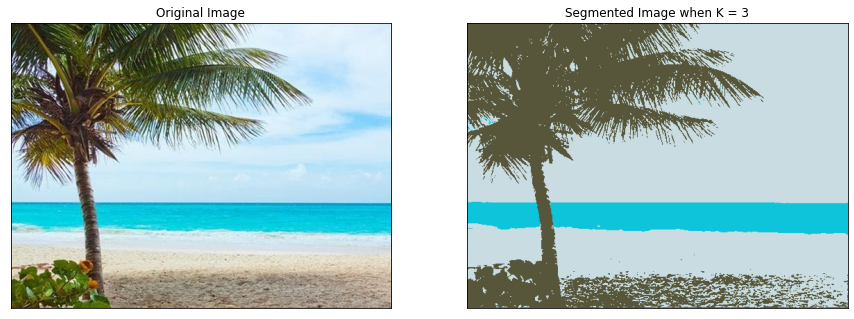

In [25]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

#Question 4:
Write a program to implement K- Nearest Neighbor classifier.

In [26]:
# Import statements
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [27]:
# load the dataset
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [28]:
# split the datatset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
# use the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [30]:
# Predict the dataset
y_pred = knn.predict(X_test)

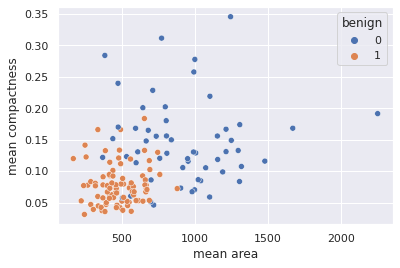

In [31]:
# Plot the dataset
sns.scatterplot(x='mean area', y='mean compactness', hue='benign', data=X_test.join(y_test, how='outer'))

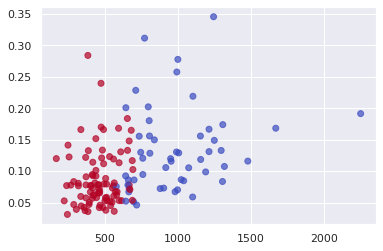

In [32]:
plt.scatter(X_test['mean area'], X_test['mean compactness'], c=y_pred, cmap='coolwarm', alpha=0.7)

In [33]:
# find the confusion matrix
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

In [34]:
# Accuracy
metrics.accuracy_score(y_test, y_pred)

0.8461538461538461